<b>Partie 1 : Regression linéaire univariée</b>

1. Créer les données d’entrée `X` (les surfaces des maisons) et de sortie `y` (prix de maisons)
- `X` est un tableau bidimensionnel dont :
    - chaque ligne est un individu (une maison)
    - Chaque colonne est un feautre (la surface)
- `y` est un tableau unidimensionnel
2. Créer et configurer le modèle de la régression linéaire avec Descente de Gradient Stochastique (SGD)

    -> Utiliser soit la classe `SGDRegressor` de sklearn.linear_model

    -> Spécifier les arguments suivants :
    
        - learning_rate='constant’
        - eta0=0.001
        - max_iter=10000
        - tol=0.001
        - loss='squared_error’
        - penalty=None
        - verbose=1
        
3. Entrainer le modèle en utilisant la function `fit()`
4. Vérifier les valeurs optimales des paramètres :
    - `coefficients (w)`
    - `intercept (b)`
5. En utilisant le modèle entrainé, appeler la fonction `predict()` pour prédire la sortie d’un nouvel individu
6. Visualiser le modèle ainsi que les données d'entrainement <font color='red'>[Optionnelle]</font>

<b>1. Création des données</b>

In [58]:
import pandas as pd

df_maisons=pd.read_csv('maisons.csv')
df_maisons

,surface,nb_chambre,type,prix,cher
0,100,3,normal,300,0
1,150,4,haut standing,500,1
2,120,3,normal,400,0
3,80,2,normal,250,0
4,200,5,haut standing,600,1
5,110,3,normal,320,0
6,130,4,normal,410,1
7,90,2,normal,280,0
8,70,2,normal,230,0
9,180,4,haut standing,580,1


In [59]:
X=df_maisons[['surface']]
y=df_maisons['prix']

In [60]:
X.head()

,surface
0,100
1,150
2,120
3,80
4,200


In [61]:
y.head()

0    300
1    500
2    400
3    250
4    600
Name: prix, dtype: int64

<b>2. Création & configuration du modèle de regression</b>

In [146]:
from sklearn.linear_model import SGDRegressor

regressor=SGDRegressor(learning_rate='constant', 
                        eta0=0.00001,
                        max_iter=10000,
                        tol=0.001,
                        loss='squared_error',
                        penalty=None,
                        random_state=42,
                        verbose=0)

<b>3. Entrainement du modèle</b>

In [147]:
regressor.fit(X,y)

SGDRegressor(eta0=1e-05, learning_rate='constant', max_iter=10000, penalty=None,
             random_state=42)

<b>4. Valeurs optimales des paramètres</b>

In [148]:
w=regressor.coef_
w

array([3.06361411])

In [149]:
b=regressor.intercept_
b

array([0.02877073])

<b>5. Prédiction du prix d'une nouvelle maison</b>

In [150]:
x_new=pd.DataFrame([[80]], columns=['surface'])
x_new

,surface
0,80


In [151]:
y_new=regressor.predict(x_new)
print('Prix =%.1f' % (y_new[0]))

Prix =245.1


<b>6. Visualisation du modèle[Optionnelle]</b>

In [152]:
df=df_maisons.sort_values(by='surface')
X=df[['surface']]
y=df['prix']
y_pred=regressor.predict(X)

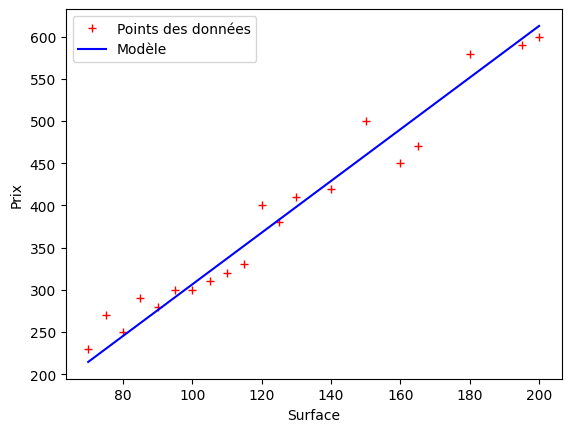

In [153]:
import matplotlib.pyplot as plt

plt.plot(X,y,'r+', label='Points des données')
plt.plot(X,y_pred,'b-', label='Modèle')
plt.xlabel('Surface')
plt.ylabel('Prix')
plt.legend()
plt.show()